# Week 7

## Part 1: Processing real text

In [1]:
import nltk
import cPickle as pickle
import math
import timeit
from __future__ import division
# custom module used for philosopher files
import philosophers as ph

### Exercise: NLPP1e 3.12: 6, 30.

**Q1:** Describe the class of strings matched by the following regular expressions.

* [a-zA-Z]+

Any character or set of character in the alapheblt regardless of the capitilization at least one time.
ex. a, aASfdthsFJ, HELLO

* [A-Z][a-z]*

Matches to a captial letter at the start of the word and zero or more character after. Useful for matching to nouns or words that start at the beginning of a sentence.

* p[aeiou]{,2}t

Matches the first letter p and up to 2 vowels and the last letter t.

* \d+(\.\d+)?

Matches integer and decimals numbers but can also match repeated decimal placeholders (ex. 3.4.5.1.). Will never match more then one '.' in a row but can match multiple digits between '.'. 

* ([^aeiou][aeiou][^aeiou])*

Matches a non-vowel character then a vowel character followed by another non-vowel character zero or more times. So this will match all vowels that are "sandwhiched" by two consonants.

In [2]:
# Test answers using nltk.re_show()
test_string = 'How aRe YOU A a612t64h lol 3343 5.6.7 6..78.8 this semseter pet pat pueit peit paat'
nltk.re_show('[a-zA-Z]+',test_string)
nltk.re_show('[A-Z][a-z]*',test_string)
nltk.re_show('p[aeiou]{,2}t',test_string)
nltk.re_show('\d+(.\d+)?',test_string)
nltk.re_show('([^aeiou][aeiou][^aeiou])*',test_string)

{How} {aRe} {YOU} {A} {a}612{t}64{h} {lol} 3343 5.6.7 6..78.8 {this} {semseter} {pet} {pat} {pueit} {peit} {paat}
{How} a{Re} {Y}{O}{U} {A} a612t64h lol 3343 5.6.7 6..78.8 this semseter pet pat pueit peit paat
How aRe YOU A a612t64h lol 3343 5.6.7 6..78.8 this semseter {pet} {pat} pueit {peit} {paat}
How aRe YOU A a{612t64}h lol {3343 5}.{6.7} {6}..{78.8} this semseter pet pat pueit peit paat
{How aR}e{} {}Y{}O{}U{} {}A{ a6}1{}2{}t{}6{}4{}h{} {lol} {}3{}3{}4{}3{} {}5{}.{}6{}.{}7{} {}6{}.{}.{}7{}8{}.{}8{} {}t{his} {semset}e{}r{} {pet} {pat} {}p{}u{}e{}i{}t{} {}p{}e{}i{}t{} {}p{}a{}a{}t{}


**Q2:** Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

In [3]:
raw = """The gold dollar was a coin struck as a regular issue by the United States Bureau of the Mint from 1849 to 
        1889. The coin had three types over its lifetime, all designed by Mint Chief Engraver James B. Longacre. 
        The Type 1 issue had the smallest diameter of any United States coin ever minted. A gold dollar had been 
        proposed several times in the 1830s and 1840s, but was not initially adopted. Congress was finally galvanized 
        into action by the increased supply of bullion from the California gold rush, and in 1849 authorized a gold dollar. 
        In its early years, silver coins were being hoarded or exported, and the gold dollar found a ready place in commerce. 
        Silver again circulated after Congress required in 1853 that new coins of that metal be made lighter, and the 
        gold dollar became a rarity in commerce even before federal coins vanished from circulation amid the economic 
        disruption of the American Civil War. Gold did not circulate again in most of the nation until 1879, and even 
        then, the gold dollar did not regain its place in commerce. In its final years, struck in small numbers, it was 
        hoarded by speculators and mounted in jewelry."""

tokens = nltk.word_tokenize(raw)

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

print "Porter Stemmer"
print [porter.stem(t) for t in tokens]

print "\nLancaster Stemmer"
print [lancaster.stem(t) for t in tokens]

Porter Stemmer
[u'The', u'gold', u'dollar', u'wa', u'a', u'coin', u'struck', u'as', u'a', u'regular', u'issu', u'by', u'the', u'Unit', u'State', u'Bureau', u'of', u'the', u'Mint', u'from', u'1849', u'to', u'1889', u'.', u'The', u'coin', u'had', u'three', u'type', u'over', u'it', u'lifetim', u',', u'all', u'design', u'by', u'Mint', u'Chief', u'Engrav', u'Jame', u'B.', u'Longacr', u'.', u'The', u'Type', u'1', u'issu', u'had', u'the', u'smallest', u'diamet', u'of', u'ani', u'Unit', u'State', u'coin', u'ever', u'mint', u'.', u'A', u'gold', u'dollar', u'had', u'been', u'propos', u'sever', u'time', u'in', u'the', u'1830', u'and', u'1840', u',', u'but', u'wa', u'not', u'initi', u'adopt', u'.', u'Congress', u'wa', u'final', u'galvan', u'into', u'action', u'by', u'the', u'increas', u'suppli', u'of', u'bullion', u'from', u'the', u'California', u'gold', u'rush', u',', u'and', u'in', u'1849', u'author', u'a', u'gold', u'dollar', u'.', u'In', u'it', u'earli', u'year', u',', u'silver', u'coin', u'we

Notable differences:

> * Lancaster stemmer removed the ar from dollar
> * Lancaster transforms rarity into rar so it can match rare and rarity while the stemmer porter does not do the same. Many other cases of this example, Lancaster is going to the base word.


## Part 2: Words that characterize the branches

**Setup:**

In [4]:
# Only needs to be ran once
# # create files that will not have any wikipedia markup

# # set the directory to be seperate from the previous one used
directory = './phil-no-markup'

# # pass in custom payload
# payload = {
#     'action': 'query',
#     'format': 'json',
#     'prop': 'extracts',
#     'exlimit': 'max',
#     'explaintext': '',
#     'rvprop': 'content'
# }

# # create the file dump
# ph.file_dump(directory=directory, **payload)

In [5]:
# the branches are aestheticians, epistemologists, ethicists, logicians, metaphysicians, social_politicals
# convert the returned tuple to a list for iteration
branches = list(ph.lists())

**Explain in your own words the point of TF-IDF.** 

TF stands for term frequency and IDF stands for inverse document frequency. TF-IDF is a measure of how frequently a word appears in a document but is proportional to the amount of times it appears in a colllection of documents (corpus).

In [6]:
def phil_tokenizer(raw):
    # create stemmer
#     porter = nltk.PorterStemmer()
    # impossible to use stem
    
    # get tokens from raw text
    tokens = nltk.word_tokenize(raw)
    
    # retrieve common stop words form nltk
    stopwords = set(nltk.corpus.stopwords.words('english'))
    # remove some custom stop words, these words appear often but have no special meaning in the text
    # ex. philosophy is expected to be used a lot, many philosphers attended university so this is a common term
#     custom_stopwords = set(['also', 'one', 'philosophy', 'philosophical', 'philosopher', 'university', 'new', 'work', 'works'])
    
    # retrieve list of unique philosphers from custom module
    unique_philosphers = set(ph.combined())
    
    # combined list of words to remove
    removewords = stopwords.union(unique_philosphers) # .union(custom_stopwords)
    
    # isalpha returns true when no special characters and numbers are in a string
    # create stemmed list of tokens not found in remove words or when isaplha is not satisfied
    return [t.lower() for t in set(tokens) if t.lower() not in removewords and t.isalpha()]

def open_file(directory, name):
    try:
        with open(directory + '/' + name + '.pickle', 'rb') as f:
            try:
                # files saved in tuple format
                (phil, wikicontent) = pickle.load(f)
                f.close()
            except Exception as e:
                print e, file
        return wikicontent
    except Exception as e:
        print name + ',', 
        return ''

In [7]:
print 'Philospher which content can not be retrieved due to exlimit issue: '
# combined list of tokens
all_tokens = []
for branch in branches:
    # tokens for each branch
    tokenized_branch = []
    # for every philopsher in each branch tokenize and append to list
    for phil in branch:
        # get the wikicontent without mark up from file
        wikicontent = open_file(directory, phil)
        # get the tokens from the wikicontent
        tokens = phil_tokenizer(wikicontent)
        # add the tokens to the list of tokens
        tokenized_branch.extend(tokens)
    # save list of tokens in a branch to list of all tokens
    all_tokens.append(tokenized_branch)

# save branches to seperate lists by unpacking as a tuple
aestheticians, epistemologists, ethicists, logicians, metaphysicians, social_politicals = tuple(all_tokens)

Philospher which content can not be retrieved due to exlimit issue: 
Arthur C. Danto, Friedrich Wilhelm Joseph von Schelling, Garry Hagberg, W.K. Wimsatt, Karl Wilhelm Friedrich von Schlegel, August Wilhelm von Schlegel, Yusuf Balasagun, Schopenhauer's aesthetics, George Birkhoff, George Edward Moore, G.W.F. Hegel, Friedrich A. Hayek, W.V.O. Quine, Tenzin Gyatso, Susan Wolf, William K. Frankena, Edward Hundert, Pierre Abélard, Seyyed Hossein Nasr, Francis Jeffrey, Friedrich Daniel Ernst Schleiermacher, Barron Lerner, Ismail Raji' al-Faruqi, David Friedrich Strauss, Karl Wilhelm Friedrich von Schlegel, Mortimer Adler, Hsun Tzu, Fazlur Rahman, Charles L. Stevenson, Mohandas Gandhi, Peter B. Andrews (mathematician), Luitzen Egbertus Jan Brouwer, John Duns Scotus, Peter of Spain (author), Pierre Abelard, William Craig (logician), Michael A. E. Dummett, Richard the Sophister, Adolf Fraenkel, David Kellogg Lewis, Carew Meredith, Richard Routley, Ahmed Raza Khan, Saunders MacLane, Frank Plump

Calculating TF:

In [8]:
tf_lists = []
for branch_tokens in all_tokens:
    fd = nltk.FreqDist(branch_tokens)
    tf_lists.append(fd.items())
    print sorted(fd.items(), key=lambda x: -x[1])[:5]

[(u'philosophy', 152), (u'new', 145), (u'life', 136), (u'university', 135), (u'works', 133)]
[(u'philosophy', 162), (u'philosophical', 113), (u'theory', 111), (u'university', 110), (u'new', 108)]
[(u'philosophy', 347), (u'life', 314), (u'university', 294), (u'one', 293), (u'new', 293)]
[(u'logic', 367), (u'university', 282), (u'philosophy', 263), (u'theory', 253), (u'mathematics', 251)]
[(u'philosophy', 170), (u'philosophical', 115), (u'new', 114), (u'university', 103), (u'see', 102)]
[(u'philosophy', 391), (u'political', 369), (u'new', 332), (u'life', 317), (u'university', 310)]


Calculating IDF:

In [9]:
# create set of all unique words
all_words = []

for branch_tokens in all_tokens:
    all_words.extend(set(branch_tokens))
    print len(all_words)

unique_words = set(all_words)

# save results of idf to dict
occurences = dict.fromkeys(unique_words, 0.)

# number of branches
N = len(all_tokens)

# count = 0
start = timeit.default_timer()

for word in all_words:
    occurences[word] += 1
    
idf = {}

for word, occurence in occurences.iteritems():
    idf[word] = math.log(N/occurence,10)
    
stop = timeit.default_timer()
print 'Time to complete %s' % (stop - start)

24991
46318
85681
112210
133325
174580
Time to complete 0.313067913055


In [15]:
idf['university']

0.0

Calculating TF-IDF:

In [14]:
results = []
for tf_branch in tf_lists:
    tfidf_branch = []
    for items in tf_branch:
        word = items[0]
        tf = items[1]
        idf_value = idf[word]
        tfidf = (1+math.log(tf,10)) * idf_value
        tfidf_branch.append((word, tfidf, (1+math.log(tf,10)), idf_value))
    results.append(tfidf_branch)
    
for branch in results:
    print sorted(branch, key=lambda x: -x[1])[:10]
    print '\n'

[(u'concerto', 1.4357653469175038, 1.8450980400142567, 0.7781512503836435), (u'violin', 1.3836706188572714, 1.7781512503836434, 0.7781512503836435), (u'aestheticians', 1.246644985441463, 1.6020599913279623, 0.7781512503836435), (u'ravenna', 1.246644985441463, 1.6020599913279623, 0.7781512503836435), (u'sibley', 1.246644985441463, 1.6020599913279623, 0.7781512503836435), (u'videogames', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'semiology', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'uncollected', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'hogan', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'droits', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435)]


[(u'complexit\xe9', 1.246644985441463, 1.6020599913279623, 0.7781512503836435), (u'turri', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'primatology', 1.1494237513283616, 1.4771212547196624, 0.7781512503836435), (u'glasersfeld', 1.

## Sentinment Analysis

In [46]:
import io
from __future__ import division
import nltk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Describe briefly how the list was generated.

> A list of highly frequent words were taken from Twitter, Google Books, music lyrics and New York Times. User from an online website were tasked with rating a randomized set of words from 1-9 with 1 being the saddest and 9 the happiest. Each word had 50 recorded values and the happiness average and standard deviation were calculated. 

In [22]:
# word, happiness_rank, happiness_average, happiness_standard_deviation, twitter_rank, google_rank, nyt_rank, lyrics_rank
f = io.open('./week7/labMIT-1.0.txt','r')

# Create a dictionary for easy access of happiness_average
word_happiness_index = {}

for line in f:
    cols = line.split()
    word, happiness_average = cols[0], float(cols[2])
    word_happiness_index[word] = happiness_average
    
f.close()

In [39]:
def sentinment(tokens, word_happiness_index, junk_words):
    # calculate the frequency of each word
    fd = nltk.FreqDist(tokens)
    
    # the total number of words
    total_words = len(tokens)
    # result
    happiness_average_text = 0.
    
    # for each token 
    for word in tokens:
        # if the word has a average happiness then compute the partial sum
        if word in word_happiness_index:
            happiness_average_word = word_happiness_index[word]
            normalized_freq = fd[word] / total_words
            happiness_average_text += happiness_average_word * normalized_freq
        # add the words that don't have a happiness value to a list
        else:
            junk_words.add(word)
    
    return happiness_average_text, junk_words

def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]

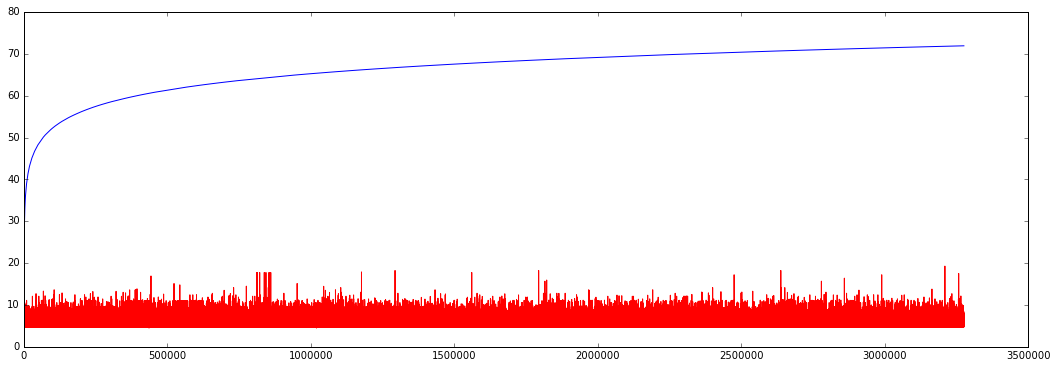

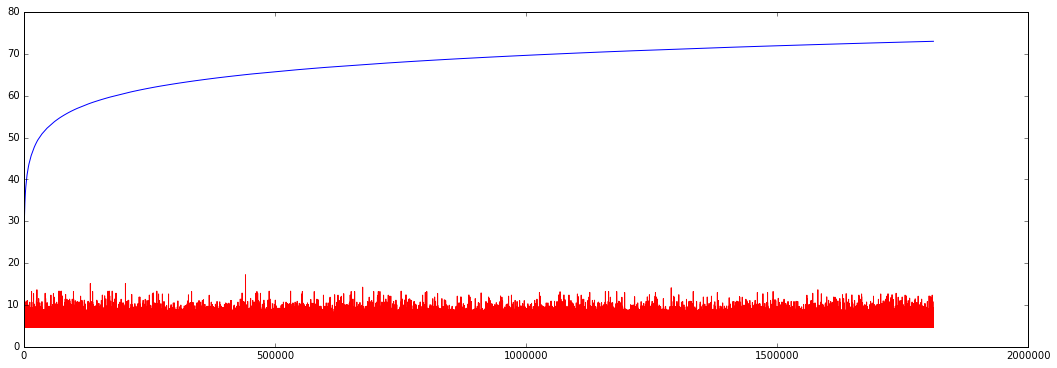

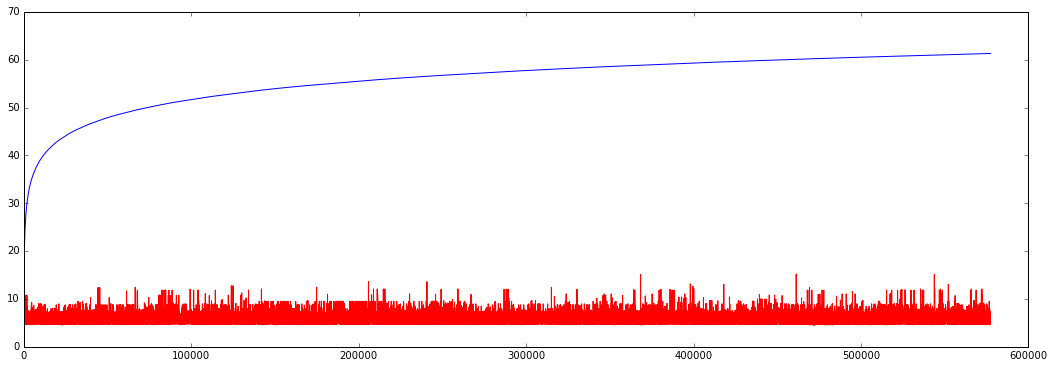

KeyboardInterrupt: 

In [48]:
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]
# window_lengths = [15,50,100,500]
window_length = 15 

# set to hold all the words that don't have a hapiness value
junk_words = set([])

# for each window length
# for window_length in window_lengths:
for text in texts:
    tokens = [word.lower() for word in text if word.isalpha()]
    
    windows = chunks(tokens, window_length)
    
    moving_average = []
    happiness_averages = []
    
    # n for calculating the moving average
    n = 1.
    for window in windows:
        for words in window:
            happiness_average_text, junk_words = sentinment(words, word_happiness_index, junk_words)
            happiness_averages.append(happiness_average_text)
            if moving_average:
                avg = happiness_average_text / n + moving_average[-1] 
                moving_average.append(avg)
            else:
                moving_average.append(happiness_average_text)
            n += 1
    x = [ii*window_length for ii in range(0, len(happiness_averages))]
    plt.figure(figsize=(18,6))
    plt.plot(x, happiness_averages, 'r-')
    plt.plot(x, moving_average, 'b-')
    plt.show()
#     print "The following %s words do not have a value for average happiness" % len(junk_words)
#     print junk_words

In [13]:
print text1

<Text: Moby Dick by Herman Melville 1851>


In [49]:
print moving_average[:10]

[6.716666666666667, 10.021666666666667, 11.621666666666666, 12.818333333333333, 14.112333333333334, 14.933444444444445, 15.61915873015873, 16.217492063492063, 16.773936507936508, 17.25393650793651]
